# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key

In [9]:
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
lat=[]
lng=[]
wind_speed=[]
city_record=[]
#Print to logger
print("Begin Data Retrival")
print("----------------------------")
counter=1
for city in cities:
    try:
        
        response=requests.get(f"{base_url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record.append(response["name"])
        print(f"Processing Record {counter}  | {city}")
        counter=counter+1
    except:
        print("City not found, skipping.....")

print("----------------------------")        
print("Data Retrival Complete")
print("----------------------------")
        

Begin Data Retrival
----------------------------
Processing Record 1  | hithadhoo
Processing Record 2  | victoria
Processing Record 3  | bethel
Processing Record 4  | kaeo
Processing Record 5  | college
Processing Record 6  | rikitea
Processing Record 7  | albany
Processing Record 8  | rupert
City not found, skipping.....
Processing Record 9  | hobart
Processing Record 10  | bredasdorp
Processing Record 11  | bomi
Processing Record 12  | cape town
Processing Record 13  | hambantota
Processing Record 14  | cabo san lucas
Processing Record 15  | ushuaia
Processing Record 16  | avarua
Processing Record 17  | busselton
Processing Record 18  | batagay
Processing Record 19  | umm kaddadah
Processing Record 20  | nome
Processing Record 21  | leningradskiy
City not found, skipping.....
Processing Record 22  | coquimbo
Processing Record 23  | narsaq
Processing Record 24  | merauke
Processing Record 25  | constitucion
Processing Record 26  | tuktoyaktuk
Processing Record 27  | canakkale
Processi

Processing Record 220  | kontagora
Processing Record 221  | chokurdakh
Processing Record 222  | kanigiri
City not found, skipping.....
City not found, skipping.....
City not found, skipping.....
City not found, skipping.....
Processing Record 223  | asahi
Processing Record 224  | ravar
Processing Record 225  | san quintin
Processing Record 226  | manggar
Processing Record 227  | severo-kurilsk
City not found, skipping.....
Processing Record 228  | alice springs
Processing Record 229  | copiapo
Processing Record 230  | vung tau
Processing Record 231  | pontianak
Processing Record 232  | perpignan
Processing Record 233  | egvekinot
Processing Record 234  | vysokogornyy
Processing Record 235  | beringovskiy
Processing Record 236  | husavik
Processing Record 237  | guaranda
Processing Record 238  | okha
Processing Record 239  | tilichiki
Processing Record 240  | kruisfontein
Processing Record 241  | kahului
Processing Record 242  | ambon
Processing Record 243  | alyangula
Processing Record

Processing Record 441  | verkhoyansk
Processing Record 442  | chernyshevskiy
Processing Record 443  | palenque
Processing Record 444  | grand gaube
Processing Record 445  | atar
Processing Record 446  | weligama
Processing Record 447  | coffs harbour
Processing Record 448  | atbasar
City not found, skipping.....
Processing Record 449  | santa vitoria do palmar
Processing Record 450  | chimbote
Processing Record 451  | norilsk
Processing Record 452  | manokwari
Processing Record 453  | swidnik
Processing Record 454  | erechim
Processing Record 455  | bilibino
Processing Record 456  | toropets
Processing Record 457  | vega de alatorre
Processing Record 458  | barmer
Processing Record 459  | alcudia
Processing Record 460  | diffa
Processing Record 461  | baiao
Processing Record 462  | mayo
Processing Record 463  | karymskoye
Processing Record 464  | saint-ambroise
Processing Record 465  | aklavik
City not found, skipping.....
Processing Record 466  | ouegoa
City not found, skipping.....
P

In [10]:
weather_dict={
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

In [12]:
#creating Data Frame
weatherDF=pd.DataFrame(weather_dict)
#Display Count
weatherDF.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#save data frame to CSV
weatherDF.to_csv('weather_data.csv')
#Display data from head
weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,0,MV,1554579503,100,-0.60,73.08,84.13,6.53
1,Victoria,75,BN,1554577200,83,5.28,115.24,82.40,3.36
2,Bethel,75,US,1554577200,73,60.79,-161.76,28.40,16.11
3,Kaeo,0,NZ,1554579485,95,-35.10,173.78,53.01,6.20
4,College,75,US,1554579220,55,64.86,-147.80,35.60,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

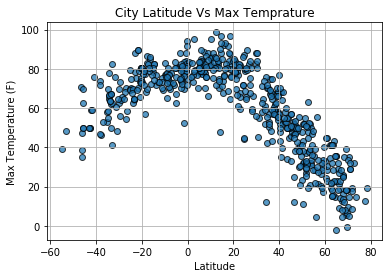

In [14]:
plt.scatter(weatherDF["Lat"],weatherDF["Max Temp"],marker="o",edgecolors="black",alpha=0.75)
plt.grid(True)
plt.title("City Latitude Vs Max Temprature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("MaxTemp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

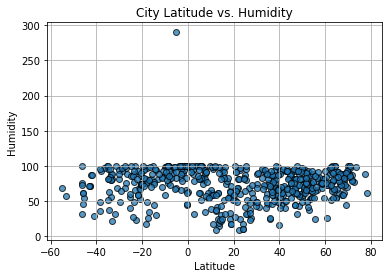

In [15]:
plt.scatter(weatherDF["Lat"],weatherDF["Humidity"],marker="o",edgecolors="black",alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

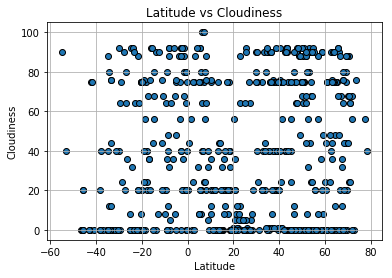

In [16]:
plt.scatter(weatherDF["Lat"],weatherDF["Cloudiness"],marker="o",edgecolors="black")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Latitude vs Cloudiness")
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

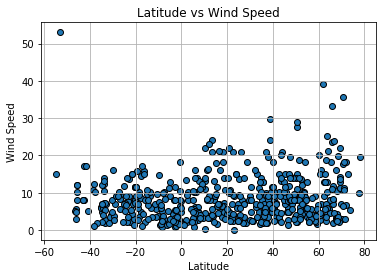

In [19]:
plt.scatter(weatherDF["Lat"],weatherDF["Wind Speed"],marker="o",edgecolors="black")
plt.grid(True)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Latitude vs Wind Speed")
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()

In [18]:
print("Data analysis & charts reflect that the analysis summary holds true.")

Data analysis & charts reflect that the analysis summary holds true.
